## データで見る港区長選

はじめまして！
最近保育士インターンしてる時にこんな雑談になりました。<br>「データサイエンスって具体的になにしてるの？」<br>私も正直本質に迫れてるかというと否です。<br>pythonいじってますとしか言えないのも辛いので、せっかくなら多少は共通の話題のある港区長選で。。。と思いやりました。<br>

pip installすることで誰でもこの下のコードを手元でいじれます

In [17]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


下のコードはこれからのコードで使われるライブラリをコード内にインポートしています

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = '/System/Library/Fonts/ヒラギノ明朝 ProN.ttc'

# フォントの設定
jp_font = font_manager.FontProperties(fname=font_path)

githubに入ってるcsvを読み込んでいます。これは港区役所にあったpdfを、そのままcsv化しようとすると難しかったためデータをコピペして整形しています。そのため細心の注意を払ってますが、間違ってる可能性があります。先頭いくつかを読み込むことでちゃんと読み込んでるか確認できます。

In [19]:
df = pd.read_csv('0602hp.csv')
print(df.head())


         投票者名  当日有権者数 (人)_男  当日有権者数 (人)_女  当日有権者数 (人)_計  投票者数 (人)_男  \
0  虎ノ門いきいきプラザ          1310          1495          2805         334   
1     南桜公園管理棟           840           818          1658         176   
2    生涯学習センター           370           341           711         107   
3   福祉プラザさくら川          2049          1948          3997         547   
4       エコプラザ          2700          2605          5305         652   

   投票者数 (人)_女  投票者数 (人)_計  投票率 (%)_男  投票率 (%)_女  投票率 (%)_計  
0         375         709      25.50      25.08      25.28  
1         202         378      20.95      24.69      22.80  
2         115         222      28.92      33.72      31.22  
3         621        1168      26.70      31.88      29.22  
4         712        1364      24.15      27.33      25.71  


このコードは、データフレーム df の基本的な情報を示しています。具体的には、データの行数や各列（データの項目）の名前と型、欠損していないデータの数などを表示します。print(df.describe()):はこちらのコードは、数値データに関する統計情報を示します。具体的には、平均値や最小値、中央値などの統計量を各数値データについて計算し、その概要を表示します。データの全体像や分布の傾向を理解するのに役立ちます

In [20]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   投票者名          41 non-null     object 
 1   当日有権者数 (人)_男  41 non-null     int64  
 2   当日有権者数 (人)_女  41 non-null     int64  
 3   当日有権者数 (人)_計  41 non-null     int64  
 4   投票者数 (人)_男    41 non-null     int64  
 5   投票者数 (人)_女    41 non-null     int64  
 6   投票者数 (人)_計    41 non-null     int64  
 7   投票率 (%)_男     41 non-null     float64
 8   投票率 (%)_女     41 non-null     float64
 9   投票率 (%)_計     41 non-null     float64
dtypes: float64(3), int64(6), object(1)
memory usage: 3.3+ KB
None
       当日有権者数 (人)_男  当日有権者数 (人)_女  当日有権者数 (人)_計   投票者数 (人)_男   投票者数 (人)_女  \
count     41.000000     41.000000     41.000000    41.000000    41.000000   
mean    2242.804878   2650.292683   4893.097561   675.829268   822.341463   
std     1053.207487   1321.375311   2359.500697   350.479236   432.502868   
min   

先ほども確認しましたが、欠損値をもう一度確認しておきます。欠損があるとデータの統計的な性質や傾向が歪んでしまう可能性やデータの統計的な性質や傾向が歪んでしまう可能性があります。今回はゼロなので埋める作業はしません。

In [21]:
#欠損値の確認
print(df.isnull().sum())


投票者名            0
当日有権者数 (人)_男    0
当日有権者数 (人)_女    0
当日有権者数 (人)_計    0
投票者数 (人)_男      0
投票者数 (人)_女      0
投票者数 (人)_計      0
投票率 (%)_男       0
投票率 (%)_女       0
投票率 (%)_計       0
dtype: int64


In [22]:
df.columns = ['投票者名', '有権者数_男', '有権者数_女', '有権者数_計', '投票者数_男', '投票者数_女', '投票者数_計', '投票率_男', '投票率_女', '投票率_計']


df_voters = df[['投票者名', '投票者数_男', '投票者数_女', '投票者数_計']]をすると全行ではなく一部のみを取り出すこともできます。

In [23]:
df_voters = df[['投票者名', '投票者数_男', '投票者数_女', '投票者数_計']]
print(df_voters.head())


         投票者名  投票者数_男  投票者数_女  投票者数_計
0  虎ノ門いきいきプラザ     334     375     709
1     南桜公園管理棟     176     202     378
2    生涯学習センター     107     115     222
3   福祉プラザさくら川     547     621    1168
4       エコプラザ     652     712    1364


平均投票率も見てみましょう。女性の方が若干投票率が高い傾向が見られますね。

In [24]:
average_male_turnout = df['投票率_男'].mean()
average_female_turnout = df['投票率_女'].mean()
average_total_turnout = df['投票率_計'].mean()

print(f"平均投票率_男: {average_male_turnout}")
print(f"平均投票率_女: {average_female_turnout}")
print(f"平均投票率_計: {average_total_turnout}")


平均投票率_男: 29.78682926829268
平均投票率_女: 30.92170731707317
平均投票率_計: 30.362439024390248


...?　あれ
港区の発表では20時最終確定	61,425	30.62%でしたね。元のpdfでも合計欄は30.62でした。
少しテストしてみましょう。

In [25]:
print((25.28 + 22.80 + 31.22 + 29.22 + 25.71 + 27.89 + 32.04 + 33.89 + 29.56 + 30.36 +
30.40 + 37.78 + 37.02 + 31.58 + 29.96 + 31.47 + 35.90 + 34.96 + 27.44 + 34.56 +
22.79 + 24.64 + 32.08 + 27.48 + 27.09 + 28.79 + 27.52 + 29.00 + 27.59 + 26.99 +
24.21 + 29.59 + 30.42 + 32.48 + 29.63 + 30.10 + 33.27 + 38.67 + 36.29 + 30.21 +
36.98) / 41)

30.362439024390248


今回はコードは間違っていないものとみなします。

投票率について他のベクトルからも見てみましょう。投票所別の投票率の頻度を棒グラフにします。

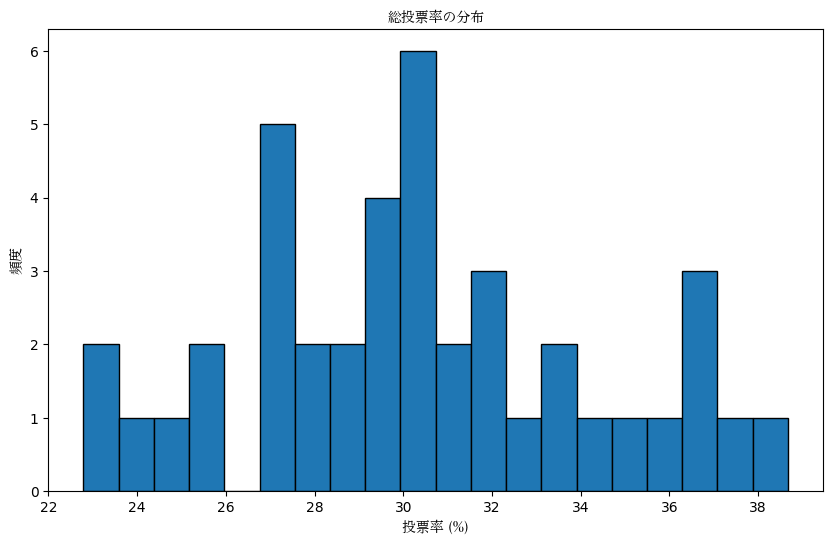

In [26]:
# 列名の設定
df.columns = [
    '投票所名', '有権者数_男', '有権者数_女', '有権者数_計',
    '投票者数_男', '投票者数_女', '投票者数_計',
    '投票率_男', '投票率_女', '投票率_計'
]

# 総投票率の分布をヒストグラムで描画
plt.figure(figsize=(10, 6))
plt.hist(df['投票率_計'], bins=20, edgecolor='black')
plt.title('総投票率の分布', fontproperties=jp_font)
plt.xlabel('投票率 (%)', fontproperties=jp_font)
plt.ylabel('頻度', fontproperties=jp_font)
plt.show()


最頻値が平均値の30.36に近い、極端に異なる投票所はないのはわかります。

男女の投票率についてもさらにみていきます。

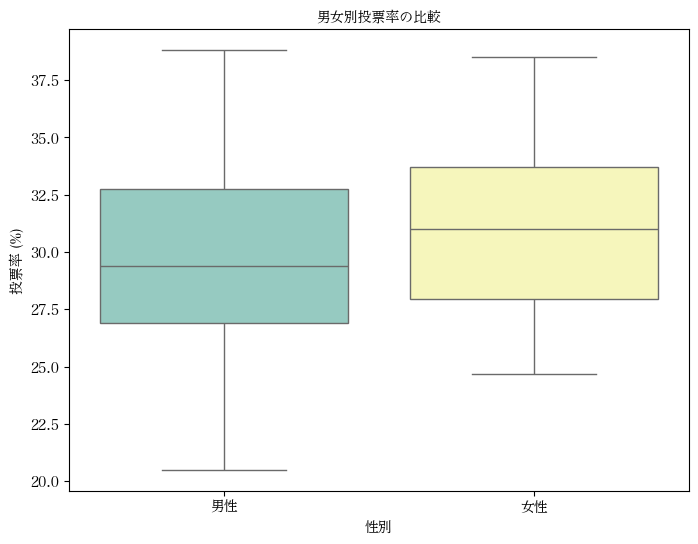

In [37]:
font_path = '/System/Library/Fonts/ヒラギノ明朝 ProN.ttc'
jp_font = font_manager.FontProperties(fname=font_path)

# ボックスプロットを描画
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['投票率_男', '投票率_女']], palette='Set3')
plt.title('男女別投票率の比較', fontproperties=jp_font)
plt.xlabel('性別', fontproperties=jp_font)
plt.ylabel('投票率 (%)', fontproperties=jp_font)
plt.xticks(range(2), ['男性', '女性'], fontproperties=jp_font)
plt.yticks(fontproperties=jp_font)
plt.show()


箱ひげで見ると前の結果と同じく、男性の方が全体的に投票率が低い傾向が見られます。ただ意外なことに、最大値は男性の方が大きくなっています。

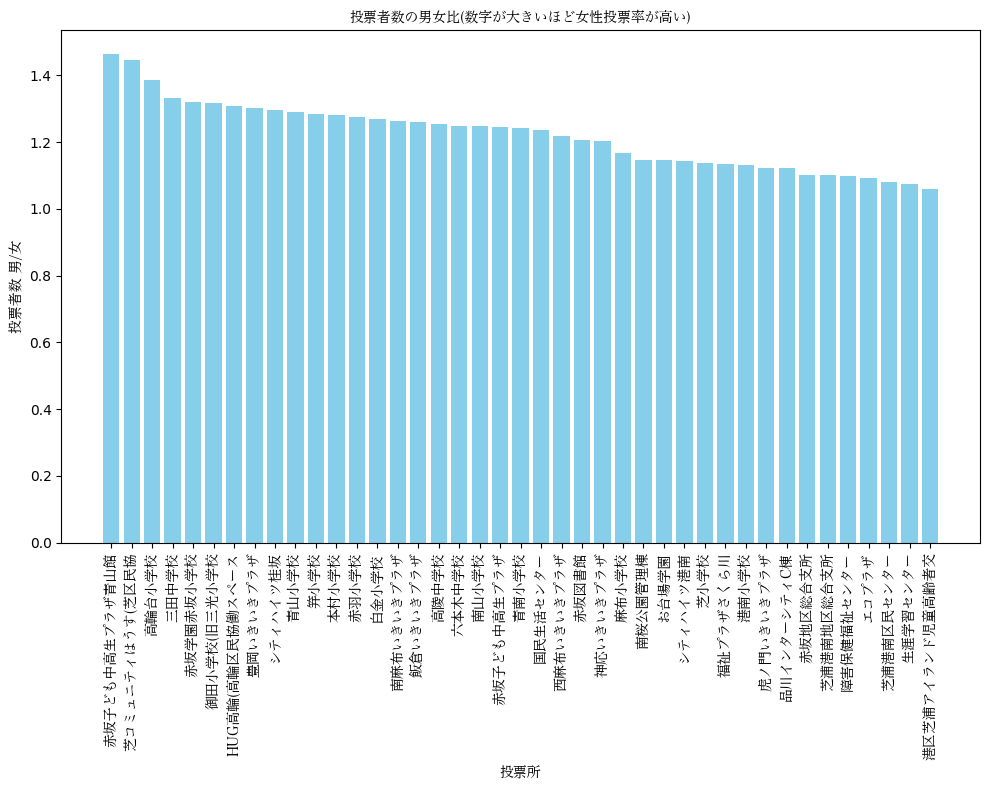

In [28]:
## 男女の投票者数比を計算
df['投票者数_男_女比'] = df['投票者数_女'] / df['投票者数_男']

# 比率でソート
df_sorted = df.sort_values('投票者数_男_女比', ascending=False)

# 棒グラフを描画
plt.figure(figsize=(10, 8))
plt.bar(df_sorted['投票所名'], df_sorted['投票者数_男_女比'], color='skyblue')
plt.xticks(rotation=90, fontproperties=jp_font)
plt.title('投票者数の男女比(数字が大きいほど女性投票率が高い)', fontproperties=jp_font)
plt.xlabel('投票所', fontproperties=jp_font)
plt.ylabel('投票者数 男/女', fontproperties=jp_font)
plt.tight_layout()
plt.show()

もっと視覚的に投票所別の傾向を見てみましょう。

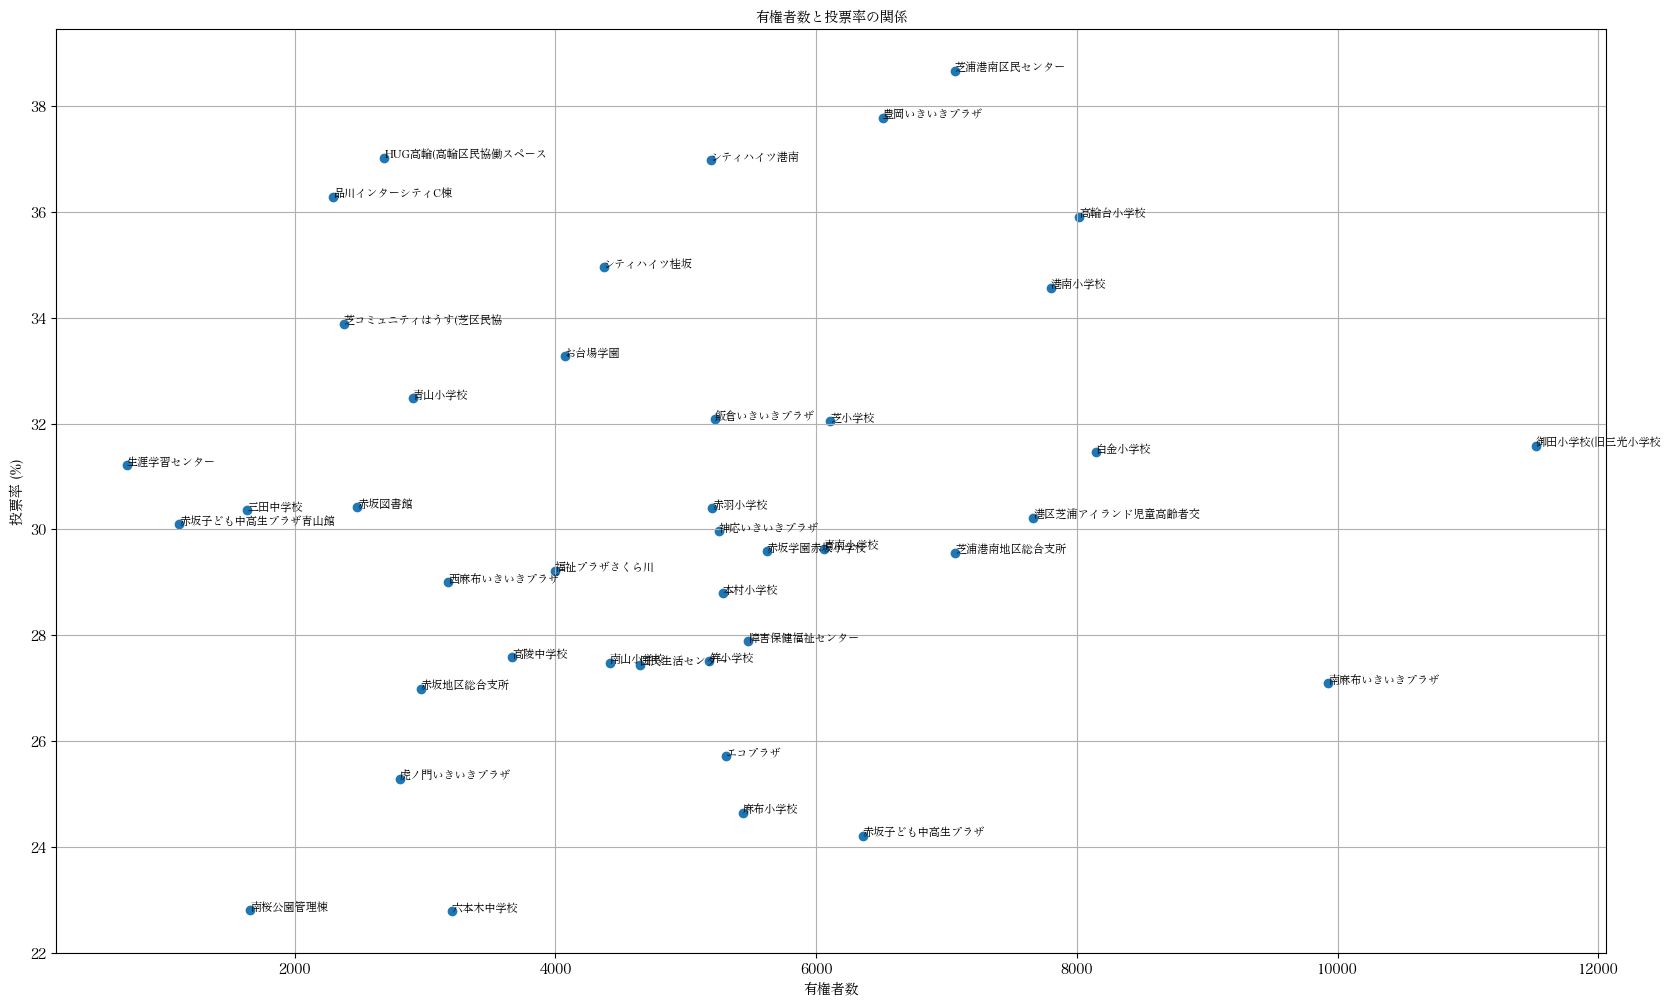

In [29]:
# 散布図を描画
plt.figure(figsize=(20, 12))
plt.scatter(df['有権者数_計'], df['投票率_計'])

# 各点に投票所名を日本語で表示
for i in range(len(df)):
    plt.text(df['有権者数_計'][i], df['投票率_計'][i], df['投票所名'][i], fontsize=8, fontproperties=jp_font)

plt.title('有権者数と投票率の関係', fontproperties=jp_font)
plt.xlabel('有権者数', fontproperties=jp_font)
plt.ylabel('投票率 (%)', fontproperties=jp_font)
plt.xticks(fontproperties=jp_font)
plt.yticks(fontproperties=jp_font)
plt.grid(True)
plt.show()

もっと詳細にわけれますが主に4つに特徴をわけれると思います。<br>
すなわち<br>
-芝浦港南区民センター(芝浦)、富岡いきいきプラザ(三田)、高輪台小学校(高輪)、港南小学校（港南）といった有権者も投票率も多いベクトル<br>
-シティハイツ港南（港南）、シティハイツ高輪（高輪）、HUG高輪(高輪区民協働スペース（高輪）、品川インターシティC棟(港南)<br>
-青南小学校（青山）、（旧）神応小学校（白金）、赤坂学園赤坂小学校（赤坂）、本村小学校（麻布）といった有権者も投票率も中間的なベクトル<br>
-赤坂地区総合支所(赤坂)、虎ノ門いきいきプラザ(虎ノ門)、六本木中学校(六本木)、南桜公園管理棟(新橋)といった有権者も投票率も少ないベクトルです。


ところで話は変わりますが、データサイエンティストはデータから引き出す価値を最大化するために、統計学や数学、プログラミングなどの技術を駆使してデータ活用を実践するスペシャリストと言われています。授業ではpythonをいじっていますと説明していますが、実際はそれだけではありません。仕事としてのデータサイエンティストはビジネスの現場やマネジメント層などとディスカッションしながら、解くべき課題やデータの活用先を見定めもします。

この情報は、どのように活用できるでしょうか？例えば、政治家が港区長選に出馬する際にこのデータに目を通すと、選挙対策に役立つでしょう。そこで、どのような助言が考えられるか触れていきましょう。

まず、女性有権者に訴えかけることを優先します。どの投票所でも投票者の絶対数が女性の方が多く、全体的に見ても投票率が高いからです。また、最後のテーブルを見れば、赤坂や六本木の高級街向けの政策よりも、湾岸エリア、特に投票率が高い港南地区や投票者数が多い御田小学校（旧三光小学校）に訴えかけることが有効ではないか、といった助言が考えうると思います。

ただ、それは本当に正しいのでしょうか。　確かに御田小学校(旧三光小学校)は当日有権者は11,519人で、2位の南麻布いきいきプラザ、9,928人を大きく上回ってます。<br>
しかしながらそれは三田中学校と御田小学校(旧三光小学校)の２つしか三田に投票所が存在しないからで、他の地区の方が有権者数の総数は上です。ここで敢えて私のプロフィールに触れると、港区湾岸エリアに住んでる女性です。<br>
何が言いたいかというと、データの扱い方によっては意図的、または無意識のうちにミスリードを生めるということです。単に表層を見るだけではなく、他にも要因がないか分析することが重要です。ここでAI、プログラミング単一ではできない価値をデータサイエンティストは生み出していると考えます。<br>
例えば、赤坂地区の投票者は全体的に少なく、赤坂子ども中高生プラザの男性投票率は22.44%で港区最低です。しかし、これは赤坂の男性有権者がやる気がないからではないかもしれません。赤坂は社長が多く住む街として知られており、海外出張も多いため、期日前投票をしていれば、赤坂総合支所での投票となり、この票の集計に反映されていないだけかもしれません。~~(私が成人男性だったら子ども中高生プラザでの投票は躊躇ってしまうし)~~
<br>
今のAIブームは凄まじく、政界にも影響を与えています。都知事選一つをとっても小池百合子知事はAIゆりこを作成し自らの政策を打ち出し、安野たかひろ氏は自らのAIアバターに自分の政策を覚えさせ、リアルタイムでのレスポンスを可能にしようとしています。しかしそれと同時に、AIにハルシネーションがあると知ってもなお、AIを信じ他の検索を怠ってしまう人がいます。<br>

AIはまだ発展途上であり、それを理解して付き合える人間になる、それが私の大学4年間での目指すべき学びの最終的な到達点であり、命題だと思います。<br>
以上で私の大学の授業説明を終えます。